<a href="https://colab.research.google.com/github/FVRDaniel/TransferLearning-/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.VNEN3S_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


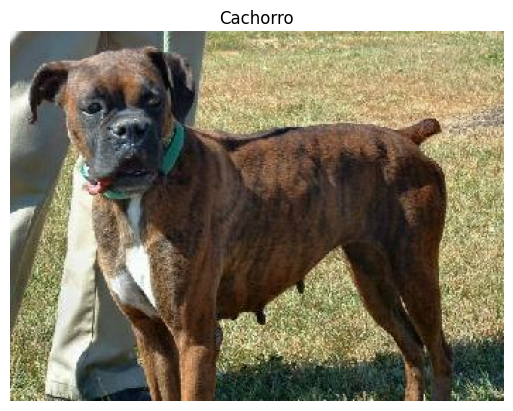

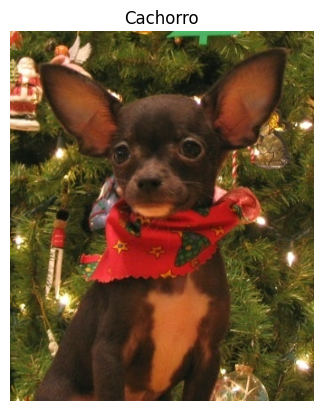

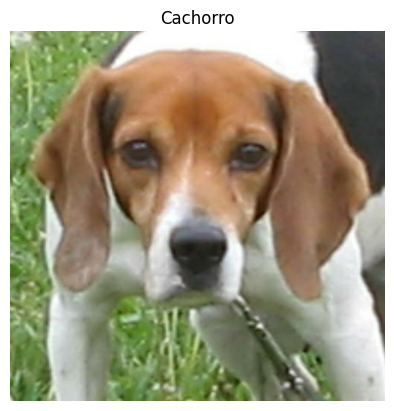

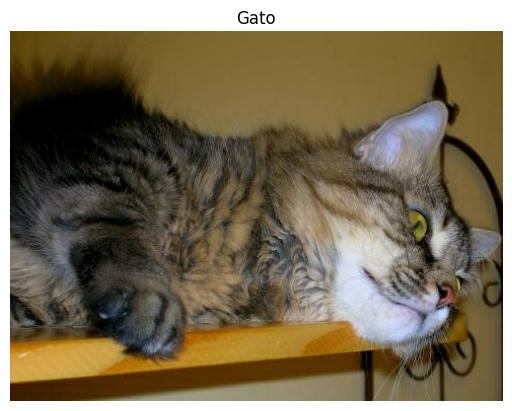

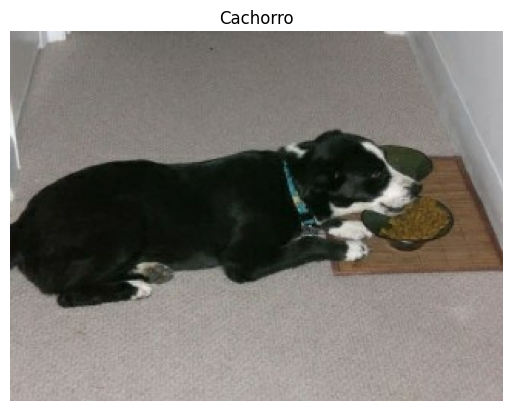

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 53s 74ms/step - accuracy: 0.9348 - loss: 0.1525 - val_accuracy: 0.9796 - val_loss: 0.0623
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 68s 60ms/step - accuracy: 0.9790 - loss: 0.0574 - val_accuracy: 0.9804 - val_loss: 0.0587
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.9821 - loss: 0.0508 - val_accuracy: 0.9802 - val_loss: 0.0581
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 34s 59ms/step - accuracy: 0.9836 - loss: 0.0468 - val_accuracy: 0.9798 - val_loss: 0.0583
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 45s 66ms/step - accuracy: 0.9850 - loss: 0.0437 - val_accuracy: 0.9798 - val_loss: 0.0587


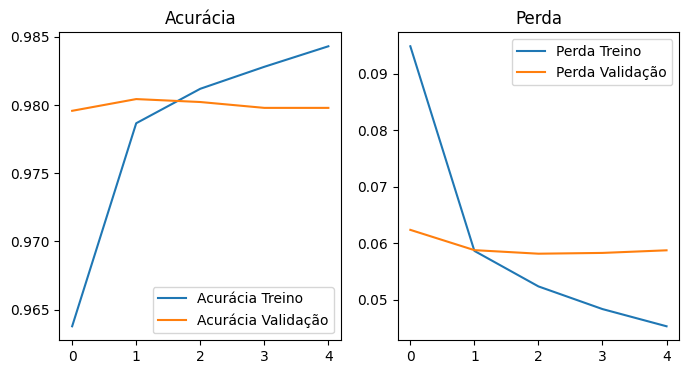

In [1]:
 import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

import tensorflow_datasets as tfds

dataset_name = "cats_vs_dogs"
(ds_train, ds_val), ds_info = tfds.load(
    dataset_name,
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

for image, label in ds_train.take(5):
    plt.imshow(image)
    plt.title("Gato" if label == 0 else "Cachorro")
    plt.axis('off')
    plt.show()

    IMG_SIZE = 160

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

ds_train = ds_train.map(preprocess).batch(32)
ds_val = ds_val.map(preprocess).batch(32)

base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(ds_train, validation_data=ds_val, epochs=5)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Acurácia Treino')
plt.plot(val_acc, label='Acurácia Validação')
plt.legend()
plt.title("Acurácia")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Perda Treino')
plt.plot(val_loss, label='Perda Validação')
plt.legend()
plt.title("Perda")
plt.show()
